# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Load CIFAR-10 data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


Вывожу несколько изображений из датасета

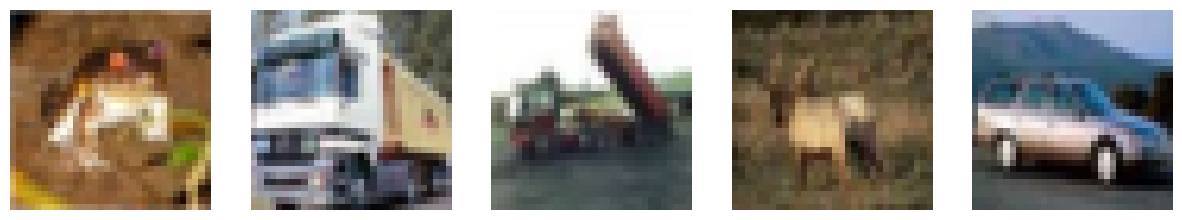

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(x_train[i])
    ax[i].axis('off')

Parse numbers as floats

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Normalize data

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [ ]:
# Model configuration
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(no_classes, activation='softmax'))

model_1.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
history_1 = model_1.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split,
            validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 81s 203ms/step - loss: 1.6737 - accuracy: 0.3822 - val_loss: 1.3551 - val_accuracy: 0.5066
Epoch 2/5
391/391 [==============================] - 80s 205ms/step - loss: 1.2654 - accuracy: 0.5471 - val_loss: 1.1776 - val_accuracy: 0.5768
Epoch 3/5
391/391 [==============================] - 80s 205ms/step - loss: 1.0912 - accuracy: 0.6156 - val_loss: 1.0519 - val_accuracy: 0.6279
Epoch 4/5
391/391 [==============================] - 79s 203ms/step - loss: 0.9731 - accuracy: 0.6589 - val_loss: 0.9767 - val_accuracy: 0.6548
Epoch 5/5
391/391 [==============================] - 82s 211ms/step - loss: 0.8759 - accuracy: 0.6931 - val_loss: 0.9503 - val_accuracy: 0.6698


### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [ ]:
# Model configuration
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128))
model_2.add(BatchNormalization())
model_2.add(Activation("relu"))
model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation("softmax"))

model_2.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
history_2 = model_2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=no_epochs,
                      verbose=verbosity,
                      validation_split=validation_split,
                      validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 84s 203ms/step - loss: 2.5191 - accuracy: 0.4876 - val_loss: 2.3530 - val_accuracy: 0.4104
Epoch 2/5
391/391 [==============================] - 80s 204ms/step - loss: 1.5008 - accuracy: 0.6466 - val_loss: 1.6693 - val_accuracy: 0.5685
Epoch 3/5
391/391 [==============================] - 78s 199ms/step - loss: 1.1113 - accuracy: 0.7038 - val_loss: 1.3593 - val_accuracy: 0.5983
Epoch 4/5
391/391 [==============================] - 78s 198ms/step - loss: 0.9070 - accuracy: 0.7380 - val_loss: 1.0629 - val_accuracy: 0.6868
Epoch 5/5
391/391 [==============================] - 78s 200ms/step - loss: 0.7729 - accuracy: 0.7700 - val_loss: 1.5137 - val_accuracy: 0.5764


### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [ ]:
# Model configuration
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(128))
model_3.add(Dropout(0.5))
model_3.add(Activation("relu"))
model_3.add(Dense(64))
model_3.add(Dropout(0.5))
model_3.add(Activation("softmax"))

model_3.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
history_3 = model_2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=no_epochs,
                      verbose=verbosity,
                      validation_split=validation_split,
                      validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 81s 206ms/step - loss: 0.6786 - accuracy: 0.7921 - val_loss: 1.0234 - val_accuracy: 0.6909
Epoch 2/5
391/391 [==============================] - 79s 203ms/step - loss: 0.6042 - accuracy: 0.8119 - val_loss: 1.1361 - val_accuracy: 0.6597
Epoch 3/5
391/391 [==============================] - 79s 202ms/step - loss: 0.5349 - accuracy: 0.8327 - val_loss: 1.0472 - val_accuracy: 0.6916
Epoch 4/5
391/391 [==============================] - 78s 200ms/step - loss: 0.4828 - accuracy: 0.8475 - val_loss: 1.1970 - val_accuracy: 0.6534
Epoch 5/5
391/391 [==============================] - 79s 203ms/step - loss: 0.4321 - accuracy: 0.8630 - val_loss: 0.9385 - val_accuracy: 0.7155


### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [ ]:
# Model configuration
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 5
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(BatchNormalization())
model_4.add(Dense(128))
model_4.add(Dropout(0.5))
model_4.add(Activation("relu"))
model_4.add(BatchNormalization())
model_4.add(Dense(64))
model_4.add(Dropout(0.5))
model_4.add(Activation("softmax"))

model_4.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
history_4 = model_2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=no_epochs,
                      verbose=verbosity,
                      validation_split=validation_split,
                      validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 81s 208ms/step - loss: 0.3861 - accuracy: 0.8792 - val_loss: 1.0690 - val_accuracy: 0.6797
Epoch 2/5
391/391 [==============================] - 81s 207ms/step - loss: 0.3490 - accuracy: 0.8908 - val_loss: 1.1110 - val_accuracy: 0.6838
Epoch 3/5
391/391 [==============================] - 80s 205ms/step - loss: 0.3221 - accuracy: 0.8980 - val_loss: 1.1517 - val_accuracy: 0.6853
Epoch 4/5
391/391 [==============================] - 81s 207ms/step - loss: 0.2799 - accuracy: 0.9135 - val_loss: 0.9953 - val_accuracy: 0.7102
Epoch 5/5
391/391 [==============================] - 79s 202ms/step - loss: 0.2562 - accuracy: 0.9215 - val_loss: 1.0949 - val_accuracy: 0.6977


### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

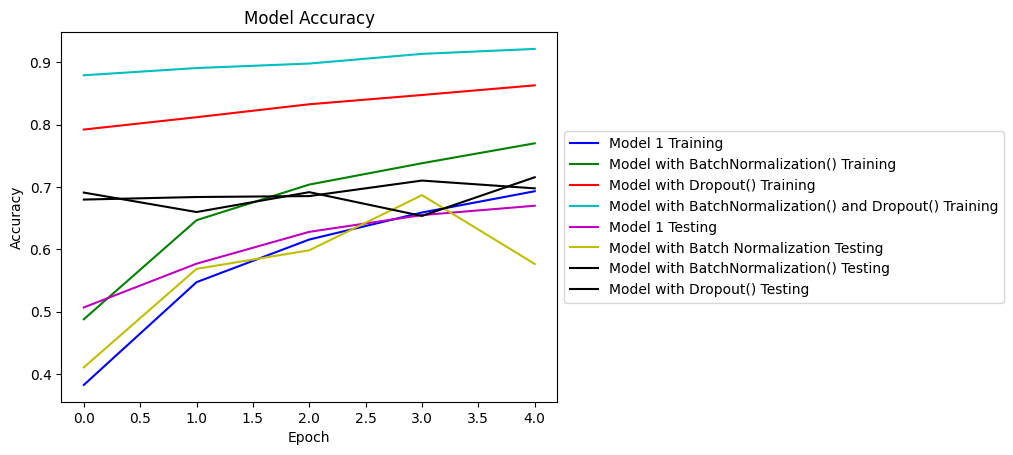

In [ ]:
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.plot(history_1.history['accuracy'], color= colors[0])
plt.plot(history_2.history['accuracy'], color= colors[1])
plt.plot(history_3.history['accuracy'], color= colors[2])
plt.plot(history_4.history['accuracy'], color= colors[3])
plt.plot(history_1.history['val_accuracy'], color= colors[4])
plt.plot(history_2.history['val_accuracy'], color= colors[5])
plt.plot(history_3.history['val_accuracy'], color= colors[6])
plt.plot(history_4.history['val_accuracy'], color= colors[6])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Training',
            'Model with BatchNormalization() Training', 
            'Model with Dropout() Training',
            'Model with BatchNormalization() and Dropout() Training',
            'Model 1 Testing', 
            'Model with Batch Normalization Testing',
            'Model with BatchNormalization() Testing', 
            'Model with Dropout() Testing',
            'Model with BatchNormalization() and Dropout() Testing'],
             loc='center left', bbox_to_anchor=(1, 0.5))

4 нейронная сеть (с BatchNormalization() и Dropout()) лучше обучается по сравнению с остальными, но точность на тестовых данных составляет 70 %. Следующая по точности - 3 нейросеть (с Dropout()). Точность натестовых данных тоже - 70%. Далее 2 нейросеть (с BatchNormalization()) и 1 нейросеть (без BatchNormalization() и Dropout()). Точность на тестовых данных 55% и 65% соответсвенно. 

Лучше рассмотреть использование BatchNormalization() и Dropout() при проектировании архитектуры нейронной сети, тк при использовании этих методов точность обучения увеличивается в разы.